In [4]:
# Import of required libraries and packages
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import scipy
import seaborn as sns
import statistics
import pandas as pd
print(ig.__version__)

#Creating and empty Graph object
graph = ig.Graph()

0.9.10


## USAir97

In [72]:
air = ig.read('USAir97.net',format='pajek')
air.summary()

'IGRAPH UNW- 332 2126 -- \n+ attr: id (v), name (v), x (v), y (v), z (v), weight (e)'

In [3]:
air.vs().attributes()

['id', 'name', 'x', 'y', 'z']

In [4]:
air.es().attributes()

['weight']

## Calculate, plot and analyse centrality measures and network properties

Task: Calculate the following centrality measures: Degree, Betweenness, average path length, Closeness, PageRank and clustering coefficient. Calculate and plot the degree and betweenness distribution. Calculate the correlation between degree, betweenness and page rank

In [5]:
nodes = air.vcount()
edges = air.ecount()
degree = air.degree()
betw = air.betweenness()
apl = air.average_path_length()
close = air.closeness()
pgrnk = air.pagerank()
clcof = air.transitivity_undirected()

In [6]:
print('Nodes', nodes)
print('Edges', edges)
print('average_path_length', apl)
print('transitivity_undirected', clcof)

Nodes 332
Edges 2126
average_path_length 2.7381247042550867
transitivity_undirected 0.3963921942964996


In [7]:
df_air = pd.DataFrame({'degree': degree,
                       'betweenness': betw, 
                       'closeness': close,
                       'pagerank': pgrnk})

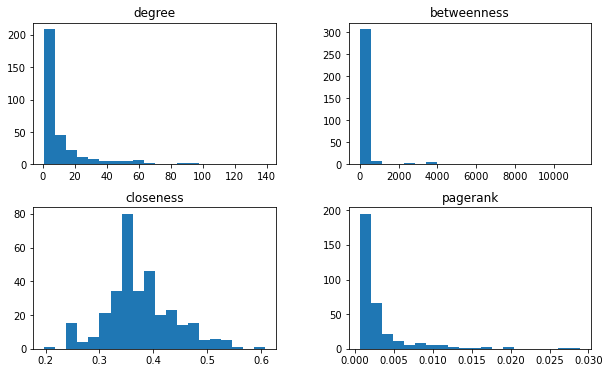

In [12]:
df_air.hist(figsize=(10, 6), grid=False, bins=20);

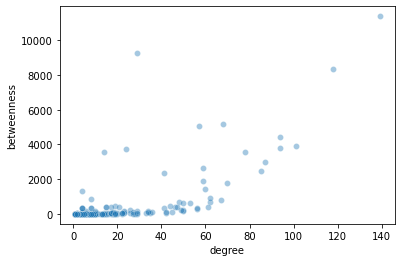

In [13]:
sns.scatterplot(data=df_air, x='degree', y='betweenness', alpha=0.4);

<AxesSubplot:>

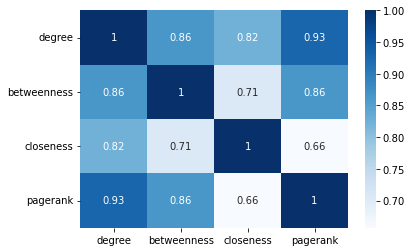

In [9]:
sns.heatmap(df_air.corr('spearman'), annot=True, cmap='Blues')

## Graph Processing

Task: Create a second network with only those nodes with a degree at least the average degree in the network

In [10]:
avg_degree = df_air['degree'].mean()
avg_degree

12.80722891566265

In [17]:
df_air.shape

(332, 4)

In [12]:
np_degree = df_air[df_air['degree']<=avg_degree]['degree']
len(np_degree)

247

In [18]:
red_air = air.subgraph(np_degree)

In [19]:
len(red_air.vs())

12

## Visualize network

Task: Create a network visualization with the Fruchterman-Reingold layout. Export the plot to a common format like JPEG or PNG

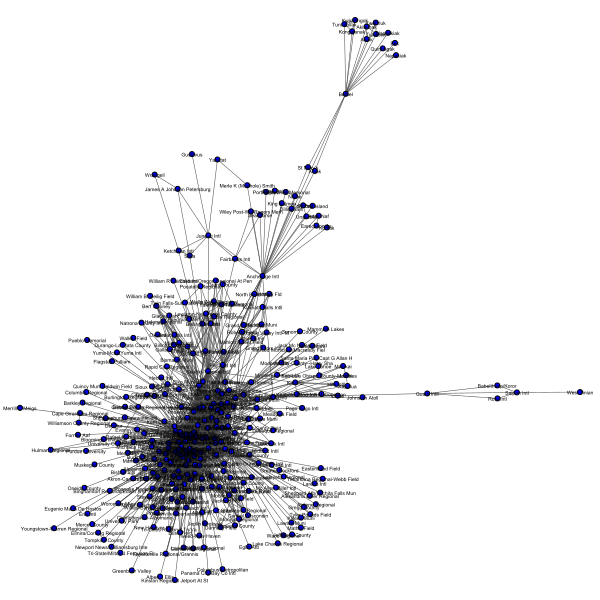

In [98]:
layout_fr = air.layout('fr')


visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = air.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=0.5
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(air, **visual_style)

## Shortest Path

Task: calculate and visualize the shortest path between ‘Sheppard Afb/Wichita Falls Mun’ and ‘West Tinian’. 

In [161]:
sp = air.get_shortest_paths(v='Sheppard Afb/Wichita Falls Mun', to='West Tinian')
sp

[[246, 260, 312, 328, 326, 331]]

In [164]:
air.vs['color'] = 'blue'

In [162]:
for i in sp:
    print(i)

[246, 260, 312, 328, 326, 331]


In [165]:
for i in sp:
    air.vs[i]['color'] = 'yellow'

In [101]:
visual_style['vertex_color'] = air.vs['color']

In [176]:
np.unique(air.vs['color'])

array(['blue', 'yellow'], dtype='<U6')

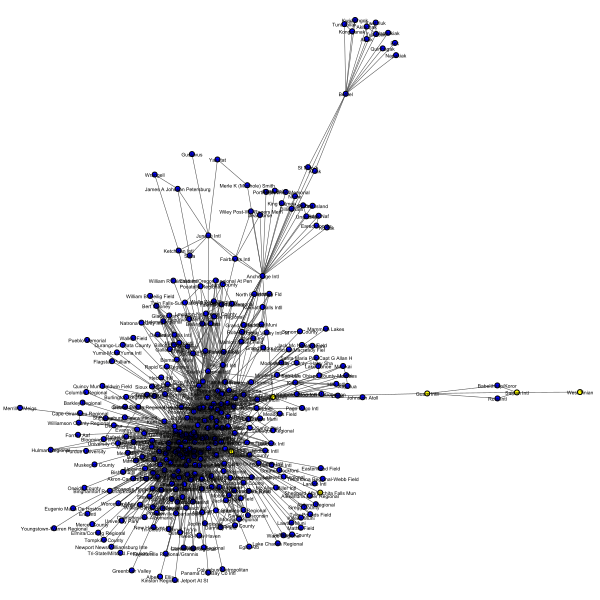

In [102]:
ig.plot(air, **visual_style)

## NetScience

Import dataset in package of your choice

In [5]:
net = ig.read('netscience.gml')

Calculate number of nodes, number of edges, density

In [6]:
net.summary()

'IGRAPH U--- 1589 2742 -- \n+ attr: id (v), label (v), value (e)'

In [18]:
net.density()

0.0021733168683312383

Calculate degree and plot degree distribution

In [25]:
net_sum = pd.DataFrame({
    'degree': net.degree(),
    'betweenness': net.betweenness()
}) 

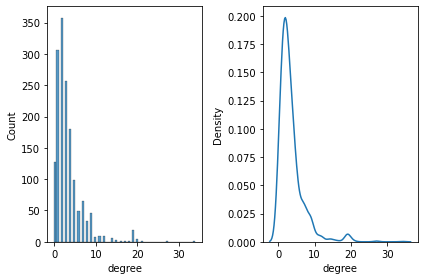

In [27]:
_, ax = plt.subplots(1, 2)
sns.histplot(net_sum['degree'], ax=ax[0])
sns.kdeplot(net_sum['degree'], ax=ax[1])
plt.tight_layout();

Describe degree distribution properties

Calculate betweenness if appropriate

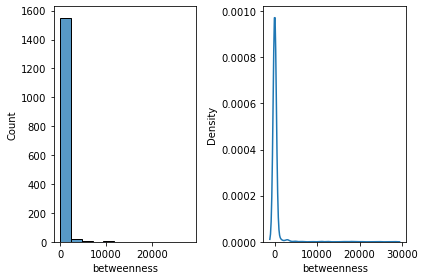

In [28]:
_, ax = plt.subplots(1, 2)
sns.histplot(net_sum['betweenness'], ax=ax[0])
sns.kdeplot(net_sum['betweenness'], ax=ax[1])
plt.tight_layout();

Identify the nodes with the highest degree and betweenness

In [203]:
# node with highest degree
high_deg = net_sum['degree'].argmax()
high_deg

33

In [204]:
# node with highest betweenness
high_bet = net_sum['betweenness'].argmax()
high_bet

78

Plot the network and identify the nodes with the highest centrality

In [205]:
net.summary()

'IGRAPH U--- 1589 2742 -- \n+ attr: color (v), id (v), label (v), ver_size (v), value (e)'

In [206]:
high = [high_deg, high_bet]
high

[33, 78]

In [283]:
net.vs['color'] = 'blue'
net.vs[high]['color'] = 'yellow'

In [286]:
net.vs['ver_size'] = 2
net.vs[high]['ver_size'] = 40

In [241]:
# 

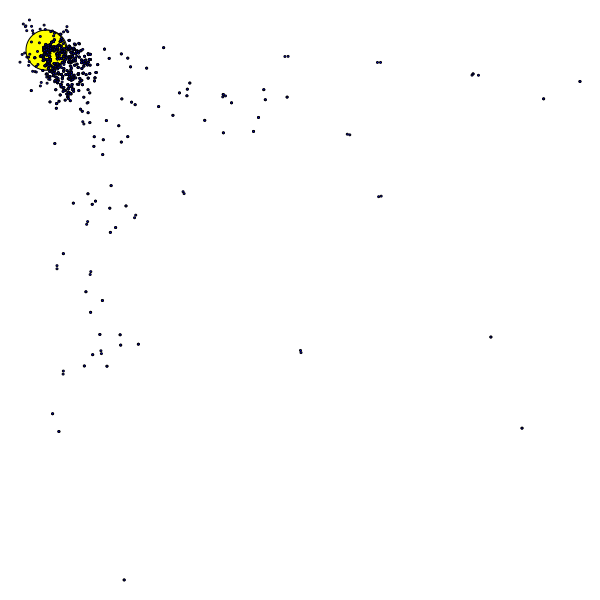

In [287]:
layout_fr = net.layout('fr')

visual_style = {}
visual_style["vertex_size"] = net.vs['ver_size']
# visual_style["vertex_size"] = 2
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = net.vs['color']
# visual_style["vertex_label"] = net.vs["id"]
visual_style["vertex_label"] = None
visual_style["layout"] = layout_fr
visual_style["edge_width"]=0.5
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(net, **visual_style)

In [ ]:
# sub_net = net.clusters()
# sub_net.summary()

# sub_net = np.array(
#     sorted(sub_net, key=len, reverse=True),
#     dtype='object')

# sub_net = net.subgraph(sub_net[0])

# sub_net.summary()

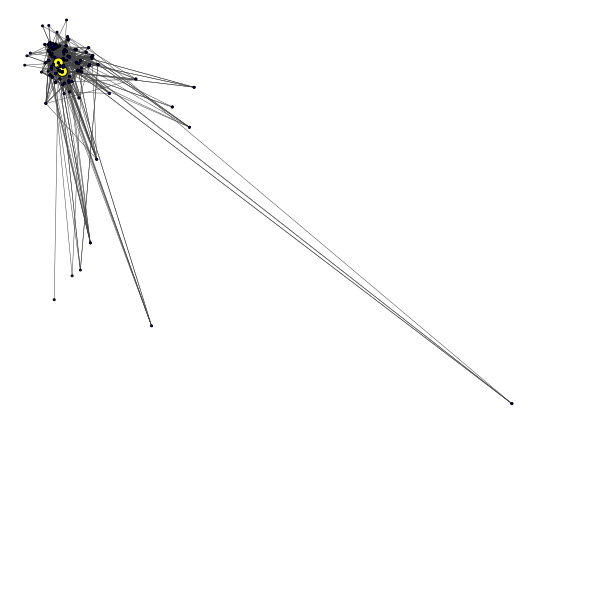

In [219]:
layout_fr = net.layout('fr')


visual_style = {}
visual_style["vertex_size"] = sub_net.vs['ver_size']
# visual_style["vertex_size"] = 2
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = sub_net.vs['color']
# visual_style["vertex_label"] = net.vs["id"]
visual_style["vertex_label"] = None
visual_style["layout"] = layout_fr
visual_style["edge_width"]=0.5
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(sub_net, **visual_style)

Remove the nodes with the highest centrality and rerun the plot. What has happened? How many nodes do you have to remove before the network structure starts to collapse?

In [288]:
net.summary()

'IGRAPH U--- 1589 2742 -- \n+ attr: color (v), id (v), label (v), ver_size (v), value (e)'

In [289]:
net.delete_vertices(high)

In [290]:
net.summary()

'IGRAPH U--- 1587 2681 -- \n+ attr: color (v), id (v), label (v), ver_size (v), value (e)'